<AxesSubplot: title={'center': 'Ten Most Property-Owning Landlords from 2016 through the Present'}, xlabel='Owners'>

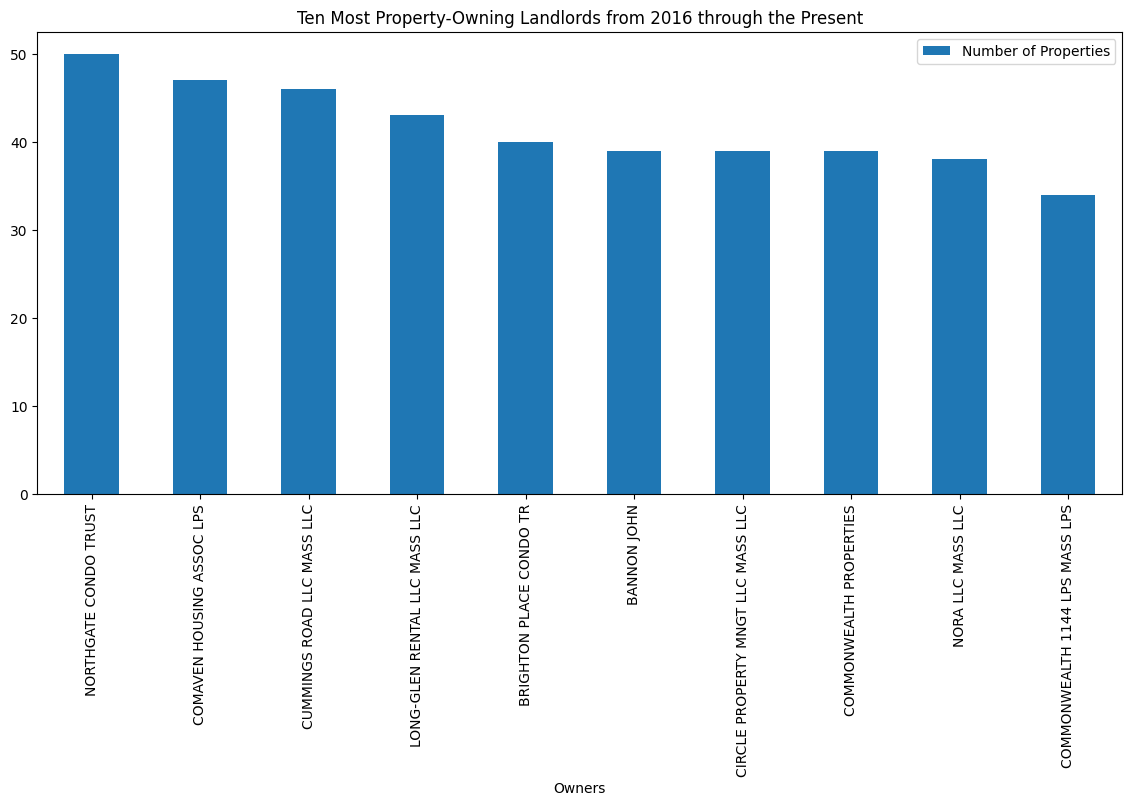

In [32]:
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#ignore by message
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv("rentsmart_2016_present.csv", low_memory=False)
df = df[df.violation_type != 'Enforcement Violations']
zip_values = [2134, 2135, 2467] # these are the three zip codes in District 9 
df.zip_code.value_counts()
# print(df.zip_code.dtype)
df = df[df.zip_code.isin(zip_values) == True]
df_val_counts = pd.DataFrame(df.owner.value_counts())
df_val_counts = df_val_counts.reset_index()
df_val_counts.columns = ['Owners', 'Number of Properties']
df_val_counts
df_val_counts.iloc[0:10].plot(x="Owners", y=["Number of Properties"],
        kind="bar", figsize=(14, 6), title="Ten Most Property-Owning Landlords from 2016 through the Present")
# df
# df

In [50]:
df
df.date = df.date.str.extract(r'(\d{1,4})').squeeze().str.zfill(4) # only kept the four digits representing the year in the date 
df
grouped_date_df = df.groupby(['date', 'zip_code', 'violation_type']).sum()
grouped_date_df
# print(type(grouped_df))
# df.plot(x="date", y=["zip_code"],
#         kind="bar", figsize=(14, 6), title="Zip Codes With the Most Violations 2016 - Present")

parcel  year built  \
date zip_code violation_type                                          
2017 2134     Housing Complaints             6303838000      5908.0   
     2135     Housing Complaints             6607925000      5819.0   
              Sanitation Requests            2202213000      1925.0   
2018 2134     Building Violations           25511690000     23304.0   
              Civic Maintenance Requests    48925992000     44356.0   
...                                                 ...         ...   
2022 2135     Housing Violations            69202358000     61941.0   
              Sanitation Requests         1120995095183    994011.0   
     2467     Civic Maintenance Requests     4007804000      3920.0   
              Housing Complaints            28088566960     27969.0   
              Sanitation Requests           30101144001     29530.0   

                                          year remodeled      latitude  \
date zip_code violation_type                                             
2017 2134     Housing Complaints                  5999.0    127.047260   
     2135     Housing Complaints                  6007.0    127.056270   
              Sanitation Requests                    0.0     42.353850   
2018 2134     Building Violations                18041.0    508.251283   
              Civic Maintenance Requests         32031.0    974.130089   
...                                                  ...           ...   
2022 2135     Housing Violations                 44015.0   1355.075189   
              Sanitation Requests               533835.0  21852.061224   
     2467     Civic Maintenance Requests          1994.0     84.595230   
              Housing Complaints                 21989.0    592.217071   
              Sanitation Requests                26117.0    634.489963   

                                             longitude  
date zip_code violation_type                            
2017 2134     Housing Complaints           -213.404670  
     2135     Housing Complaints           -213.461978  
              Sanitation Requests           -71.149740  
2018 2134     Building Violations          -853.595441  
              Civic Maintenance Requests  -1636.076180  
...                                                ...  
2022 2135     Housing Violations          -2276.894393  
              Sanitation Requests        -36715.763663  
     2467     Civic Maintenance Requests   -142.290700  
              Housing Complaints           -996.259110  
              Sanitation Requests         -1067.395087  

[62 rows x 5 columns]

In [3]:
import folium

bos_map = folium.Map(location=[42.361145, -71.057083])
bos_map.save("raw_map.html")
bos_map

In [4]:
location_df = df[['rs_prop_lat', 'rs_prop_long', 'rs_prop_yr_built']]
location_df.head()

rs_prop_lat  rs_prop_long  rs_prop_yr_built
0    42.301918    -71.079304              2007
1    42.301784    -71.063639              2008
2    42.322701    -71.101048              2011
3    42.322701    -71.101048              2011
4    42.322701    -71.101048              2011

In [5]:
from folium.plugins import HeatMap

HeatMap(location_df).add_to(bos_map)
bos_map.save("heatmap.html")
bos_map

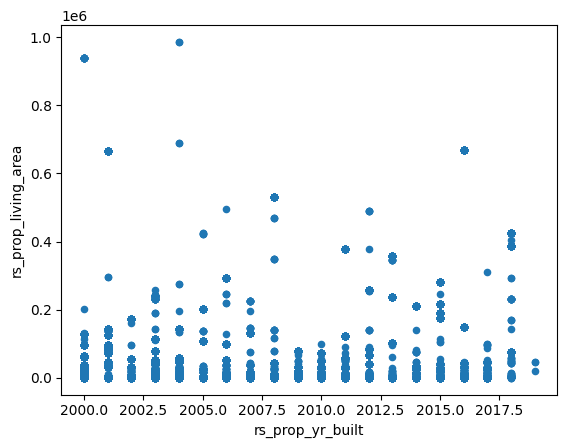

In [6]:
df['Remodeled'] = df['rs_prop_yr_remod'].map(lambda x: x.is_integer())
# df[["rs_prop_zip_code", "rs_prop_owner"]].groupby('rs_prop_zip_code').mean().plot.scatter()
df.plot.scatter(x="rs_prop_yr_built", y='rs_prop_living_area')
plt.show()

In [7]:
remodeled_df = df[['rs_prop_lat', 'rs_prop_long', 'Remodeled']]
remodeled_df.head()

HeatMap(remodeled_df).add_to(bos_map)
bos_map.save("heatmap.html")
bos_map

In [9]:
df['rs_prop_owner'].value_counts().to_csv("owners.csv")
print(df.shape)
df['Count_Column'] = df['rs_prop_owner'].map(df['rs_prop_owner'].value_counts())
# df.plot(x='rs_prop_owner', y="Count_Column", kind="pie", figsize=(10, 9))
print(df['Count_Column'])


(25627, 58)
0        20
1         2
2        30
3        30
4        30
         ..
25622     1
25623     1
25624     1
25625     1
25626     4
Name: Count_Column, Length: 25627, dtype: int64
